# Sampling in Python

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

<hr>

## Chapter 1: Introduction to Sampling

### Sampling and point estimates

- Working with a subset of the whole population is called **sampling**
- The population is the complete dataset
- Typically, we don't know what the whole population is 
- The sample is the subset of data you calculate on

In [34]:
coffee = pd.read_feather("databases/coffee_ratings_full.feather")
coffee[["total_cup_points", "variety", "country_of_origin", "aroma", "flavor", "aftertaste", "body", "balance"]].head()

,total_cup_points,variety,country_of_origin,aroma,flavor,aftertaste,body,balance
0,90.58,None,Ethiopia,8.67,8.83,8.67,8.50,8.42
1,89.92,Other,Ethiopia,8.75,8.67,8.50,8.42,8.42
2,89.75,Bourbon,Guatemala,8.42,8.50,8.42,8.33,8.42
3,89.00,None,Ethiopia,8.17,8.58,8.42,8.50,8.25
4,88.83,Other,Ethiopia,8.25,8.50,8.25,8.42,8.33


Points vs. flavor: population

In [35]:
pts_vs_flavor_pop = coffee[["total_cup_points", "flavor"]] #returns 10 random rows
pts_vs_flavor_pop.sample(n=10)

,total_cup_points,flavor
419,83.25,7.58
49,86.00,8.00
463,83.17,7.83
5,88.83,8.42
914,81.50,7.42
610,82.67,7.67
24,87.08,8.17
156,84.58,8.00
859,81.75,7.50
982,81.17,7.25


`.sample()` method works for both pandas DataFrames and Series

In [36]:
cup_points_samp = coffee["total_cup_points"].sample(n=10)
cup_points_samp

10      88.08
419     83.25
407     83.33
639     82.58
814     82.00
815     81.92
1209    78.75
942     81.42
278     83.83
1325    81.42
Name: total_cup_points, dtype: float64

A *population parameter* is a calculation made on the population dataset

In [37]:
np.mean(pts_vs_flavor_pop["total_cup_points"])

82.15120328849028

A *point estimate* or *sample statistic* is a calculation made on the sample dataset

In [38]:
np.mean(cup_points_samp)

82.658

**Point estimates with pandas**

In [39]:
print(pts_vs_flavor_pop["total_cup_points"].mean())
print(cup_points_samp.mean())

82.15120328849028
82.658


Task 1

In [40]:
spotify_population = pd.read_feather("databases/spotify_2000_2020.feather")

# Sample 1000 rows from spotify_population
spotify_sample = spotify_population.sample(n=1000)

# Calculate the mean duration in mins from spotify_population
mean_dur_pop = spotify_population["duration_minutes"].mean()

# Calculate the mean duration in mins from spotify_sample
mean_dur_samp = spotify_sample["duration_minutes"].mean()

# Print the means
print(mean_dur_pop)
print(mean_dur_samp)

3.8521519140900073
3.8466407499999997


Task 2

In [41]:
# Create a pandas Series from the loudness column of spotify_population
loudness_pop = spotify_population['loudness']

# Sample 100 values of loudness_pop
loudness_samp = loudness_pop.sample(n=100)

# Calculate the mean of loudness_pop
mean_loudness_pop = np.mean(loudness_pop)

# Calculate the mean of loudness_samp
mean_loudness_samp = np.mean(loudness_samp)

print(mean_loudness_pop)
print(mean_loudness_samp)

-7.366856851353947
-6.880710000000001


### Convenience sampling

- Collecting data by the easiest method is called - convenience sampling
- It often leads to sample being not representative, causing sample bias

In [42]:
coffee_ratings_first10 = coffee.head(10)
coffee_ratings_first10["total_cup_points"].mean()

#Convenience sample is not representative, the actual mean is around 82

89.1

**Visualizing selection bias**

*Population:*

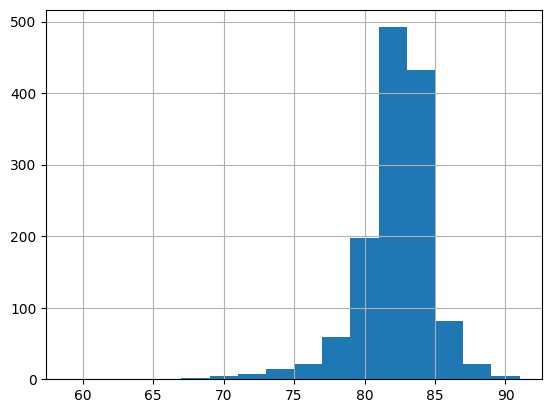

In [43]:
coffee["total_cup_points"].hist(bins=np.arange(59, 93, 2))
plt.show()

*The same code for convenience sample:*

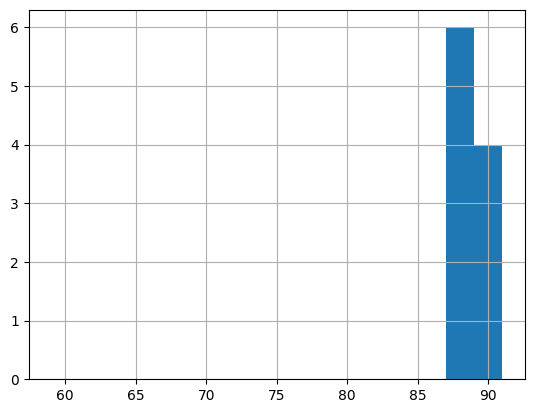

In [44]:
coffee_ratings_first10["total_cup_points"].hist(bins=np.arange(59, 93, 2))
plt.show()

Comparing two histograms it is clear that the distribution of a sample value is not the same as the sample plot

*Visualizing seelcction bias for a random selection:*

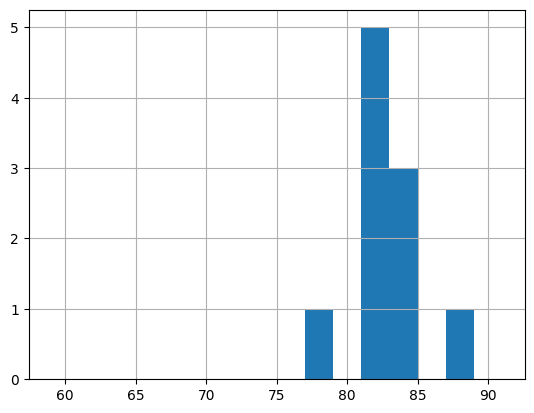

In [45]:
cup_points_samp.hist(bins=np.arange(59, 93, 2))
plt.show()

The shape of the distribution is closer to the actual population when random sampling is used

### Pseudo-random number generation

- appears to be random, but actually next "random" number is calculated from previous "random" number
- the first "random" number calculated from a seed
- The same seed value yields the same random numbers

Visualizing "random" numbers

In [46]:
randoms = np.random.beta(a=2, b=2, size=5000)
randoms

#size - how many numbers to generate

array([0.74394876, 0.63547944, 0.26581373, ..., 0.454257  , 0.19857209,
       0.17338643])

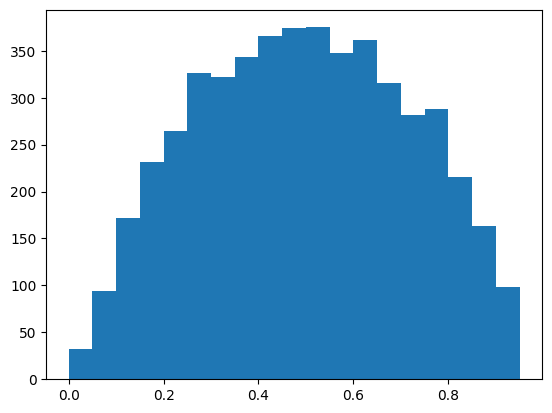

In [47]:
plt.hist(randoms, bins = np.arange(0, 1, 0.05))
plt.show()

In [48]:
np.random.seed(200000229)

In [49]:
np.random.normal(loc=2, scale=1.5, size=2)

#loc - mean
#scale - std

array([2.69861022, 5.48501273])

<hr>

## Chapter 2: Sampling Methods

### Simple random and systematic sampling

- **Simple random sampling** is similar to a lottery (we take some coffee variety one at a time - each coffee has the same chance as any other to be picked)

In [50]:
coffee.sample(n=5, random_state=19000113) #seed for reproducibility

,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
437,83.25,Arabica,exportadora de cafe condor s.a,Colombia,None,None,trilladora bonanza - armenia quindioa,3-68-0205,None,1600-1800msnm,...,None,0.0,"June 13th, 2012",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,1600.0,1800.0,1700.0
285,83.83,Arabica,ipanema coffees,Brazil,fazenda rio verde,None,ipanema coffees,002/4177/0121,ipanema coffees,1260,...,Green,0.0,"December 26th, 2014",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1260.0,1260.0,1260.0
784,82.08,Arabica,cafe politico,Colombia,None,None,None,3-59-1656,cafe politico,None,...,Green,0.0,"September 12th, 2015",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,NaN,NaN,NaN
648,82.58,Arabica,exportadora de cafe condor s.a,Colombia,None,None,trilladora boananza,3-68-0140,exportadora de cafe condor s.a,1750 msnm,...,Green,0.0,"February 27th, 2014",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,1750.0,1750.0,1750.0
155,84.58,Arabica,exportadora de cafe condor s.a,Colombia,various,None,trilladora boananza,3-68-0005,exportadora de cafe condor s.a,1800 msnm,...,Green,6.0,"October 9th, 2013",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,1800.0,1800.0,1800.0


- **Systematic sampling** samples the population at regular intervals (for example - every fifth coffee is samples)

In [51]:
sample_size = 5
pop_size = len(coffee)

interval = pop_size/sample_size
print(interval)

#However, interval must be an int, therefore we will compute integer division
#We use //

interval = pop_size // sample_size
print(interval)

267.6
267


In the example above we have seen that to get a systematic sample of five coffees on our population, we will select every 267 coffee in the dataset

To perform this operation:

In [52]:
coffee.loc[::267]

,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,90.58,Arabica,metad plc,Ethiopia,metad plc,None,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
267,83.92,Arabica,federacion nacional de cafeteros,Colombia,None,None,None,01-1969,federacion nacional de cafeteros,None,...,None,1.0,"March 11th, 2016",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,NaN,NaN,NaN
534,82.92,Arabica,consejo salvadoreño del café,El Salvador,santa josefita,1-198,beneficio cuzcachapa,09-030-273,soc. coop. cuzcachapa de r.l.,1350,...,Green,1.0,"August 28th, 2018",Salvadoran Coffee Council,3d4987e3b91399dbb3938b5bdf53893b6ef45be1,27b21e368fb8291cbea02c60623fe6c98f84524d,m,1350.0,1350.0,1350.0
801,82.00,Arabica,"lin, che-hao krude 林哲豪",Taiwan,"you siang coffee farmtainan, taiwan 台灣台南優香咖啡",None,"you siang coffee farmtainan, taiwan 台灣台南優香咖啡",Taiwan,"red on tree co., ltd.",600m,...,Green,0.0,"July 22nd, 2015",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,600.0,600.0,600.0
1068,80.50,Arabica,cqi taiwan icp cqi台灣合作夥伴,Taiwan,王秋金,1,non,None,王秋金,50,...,Blue-Green,0.0,"December 8th, 2018",Blossom Valley International,fc45352eee499d8470cf94c9827922fb745bf815,de73fc9412358b523d3a641501e542f31d2668b0,m,50.0,50.0,50.0
1335,77.17,Robusta,james moore,United States,fazenda cazengo,None,cafe cazengo,None,global opportunity fund,795 meters,...,None,6.0,"December 23rd, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,795.0,795.0,795.0


**The trouble with systematic sampling**

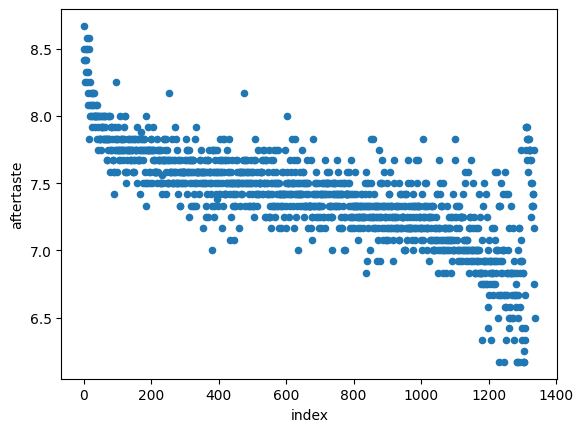

In [53]:
coffee = coffee.reset_index()
coffee.plot(x="index", y="aftertaste", kind="scatter")
plt.show()

It is only safe to use systematical sampling when we don't have pattern like this, where there is clearly a bias

**Making sure systematic sampling safe**

[]

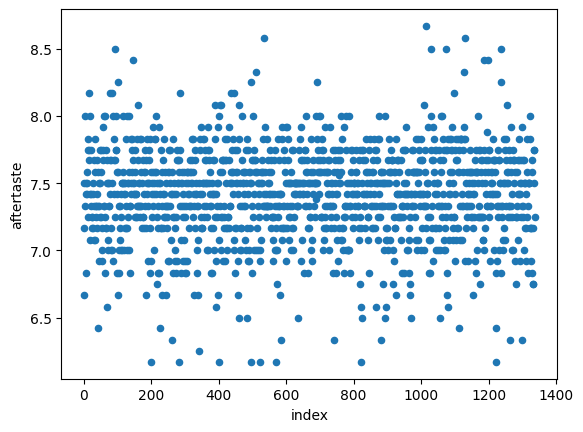

In [54]:
coffee = pd.read_feather("databases/coffee_ratings_full.feather")
#frac returns new dataframe with rows shuffles or a random part of dataset in a random order (like 10% or 20%)
shuffled = coffee.sample(frac=1) 

#Because of the shuffle indexes got mixed up in order, so we first set a proper order from to n-1 (setting True to delete previous values)
#Then we reset index one more time to use it as column
shuffled = shuffled.reset_index(drop=True).reset_index()

shuffled.plot(x="index", y="aftertaste", kind="scatter")
plt.plot()

Now thanks to the shuffle there is no such pattern as before

Notice that once we have shuffled the rows, systematic approach is basically the same as simple random sampling

### Stratified and weighted random sampling

In [55]:
top_counted_countries = ['Mexico', 'Colombia', 'Guatemala',
                         'Brazil', 'Taiwan', 'United States (Hawaii)']

top_counted_susbset = coffee['country_of_origin'].isin(top_counted_countries)

coffee_ratings_top = coffee[top_counted_susbset]
coffee_ratings_top.shape

(880, 43)

Description: The frac parameter specifies the fraction of rows to be returned from the DataFrame. It should be a float between 0 and 1, inclusive.

However these random rows are returned in random order or in other words are shuffled

In the cell below we have taken a 10% sample of our population and compared it with the distribution of the whole population

In [56]:
coffee_ratings_samp = coffee_ratings_top.sample(frac=0.1, random_state=2021)
coffee_ratings_samp['country_of_origin'].value_counts(normalize=True)

country_of_origin
Mexico                    0.250000
Guatemala                 0.204545
Colombia                  0.181818
Brazil                    0.181818
United States (Hawaii)    0.102273
Taiwan                    0.079545
Name: proportion, dtype: float64

In [57]:
coffee_ratings_top['country_of_origin'].value_counts(normalize=True)

country_of_origin
Mexico                    0.268182
Colombia                  0.207955
Guatemala                 0.205682
Brazil                    0.150000
Taiwan                    0.085227
United States (Hawaii)    0.082955
Name: proportion, dtype: float64

**Proportional stratified sampling**

In [58]:
coffee_rating_strat = coffee_ratings_top.groupby("country_of_origin")\
    .sample(frac=0.1, random_state=2021)

Calling the dot-sample method after grouping takes a simple random sample within each country

In [59]:
coffee_rating_strat['country_of_origin'].value_counts(normalize=True)

country_of_origin
Mexico                    0.272727
Colombia                  0.204545
Guatemala                 0.204545
Brazil                    0.147727
Taiwan                    0.090909
United States (Hawaii)    0.079545
Name: proportion, dtype: float64

Now the results seem to be much closer to the actual distribution

**Equal counts stratified sampling**

In [60]:
coffee_ratings_eq = coffee_ratings_top.groupby("country_of_origin")\
    .sample(n=15, random_state=2021)

coffee_ratings_eq['country_of_origin'].value_counts(normalize=True)

country_of_origin
Brazil                    0.166667
Colombia                  0.166667
Guatemala                 0.166667
Mexico                    0.166667
Taiwan                    0.166667
United States (Hawaii)    0.166667
Name: proportion, dtype: float64

We got equal proportions as we have randomly chosen 15 examples of each country

**Weighted random sampling**

Specify weights to adjust the relative probability of a row being sampled

In [61]:
coffee_ratings_weight = coffee_ratings_top.copy()
condition = coffee_ratings_weight['country_of_origin'] == "Taiwan"

#coffees made in Taiwan have two times the chance of being picked compared to other coffees
coffee_ratings_weight['weight'] = np.where(condition, 2, 1)

coffee_ratings_weight = coffee_ratings_weight.sample(frac=0.1, weights="weight")

In [62]:
coffee_ratings_weight['country_of_origin'].value_counts(normalize=True)

country_of_origin
Mexico                    0.272727
Guatemala                 0.181818
Brazil                    0.181818
Colombia                  0.181818
Taiwan                    0.136364
United States (Hawaii)    0.045455
Name: proportion, dtype: float64

***Stratified sampling is useful if you care about subgroups. Otherwise, simple random sampling is more appropriate.***

Task 1 - to better get the idea of weights

In [ ]:
# Plot YearsAtCompany from attrition_pop as a histogram
attrition_pop['YearsAtCompany'].hist(bins=np.arange(0, 41, 1))
plt.show()

# Sample 400 employees weighted by YearsAtCompany
attrition_weight = attrition_pop.sample(n=400, weights="YearsAtCompany")

# Plot YearsAtCompany from attrition_weight as a histogram
attrition_weight.hist("YearsAtCompany", bins=np.arange(0, 41, 1))
plt.show()

### Cluster Sampling

One problem with stratified sampling is that we have to collect data from every subgroup

**Stratified sampling:**
- split the population into subgroups
- use simple random sampling on every subgroup

**Cluster sampling:**
- use simple random sampling to pick some subgroups
- use simple random sampling ononly those subgroups

In [65]:
varieties_pop = list(coffee["variety"].unique())

Step 1: sampling for subgroups

In [66]:
import random 

varieties_samp = random.sample(varieties_pop, k=3)
varieties_samp

['SL14', 'Gesha', 'Other']

Step 2: sampling each group

In [ ]:
variety_condition = coffee['variety'].isin(varieties_samp)
coffee_ratings_cluster = coffee[variety_condition]

coffee_ratings_cluster["variety"] = coffee_ratings_cluster["variety"].cat.remove_unused_categories()

coffee_ratings_cluster.groupby("variety")\
    .sample(n=5, random_state=2021)

**Recap given by the DataCamp:**

You learned about cluster sampling, a cost-effective alternative to stratified sampling, especially useful when data collection is expensive. Unlike stratified sampling, which requires data from every subgroup, cluster sampling involves selecting a few subgroups randomly and then performing simple random sampling within those subgroups. Key points include:

Definition and Use: Cluster sampling is a two-stage technique where you first randomly select subgroups to include in your sample and then randomly sample within these subgroups. This method is particularly beneficial when the cost and effort of collecting data from all subgroups are prohibitive.

Practical Application: Through exercises, you applied cluster sampling to the coffee dataset by selecting a random set of coffee varieties and then sampling within these varieties. This approach was demonstrated using Python's random.sample function for the initial selection and pandas' filtering methods for the second-stage sampling.

For example, to select three random coffee varieties:

`varieties_selected = random.sample(list_of_varieties, k=3)`
Benefits: The main advantage of cluster sampling over stratified sampling is its efficiency in terms of cost and time, especially in scenarios requiring extensive data collection efforts across various subgroups.

By the end of the lesson, you were able to understand when and how to use cluster sampling, recognizing its benefits in reducing the number of subgroups sampled, thus saving time and resources.

### Comparing Sampling methods

In [68]:
coffee_ratings = pd.read_feather("databases/coffee_ratings_full.feather")
coffee_ratings = coffee_ratings[["total_cup_points", "variety", "country_of_origin", "aroma", "flavor", "aftertaste", "body", "balance"]]
coffee_ratings["country_of_origin"] = coffee_ratings["country_of_origin"].astype('category')

top_counted_countries = ['Mexico', 'Colombia', 'Guatemala',
                         'Brazil', 'Taiwan', 'United States (Hawaii)']

top_counted_susbset = coffee_ratings['country_of_origin'].isin(top_counted_countries)

coffee_ratings_top = coffee_ratings[top_counted_susbset]
coffee_ratings_top.shape

(880, 8)

***Review of simple random sampling***

In [69]:
coffee_ratings_srs = coffee_ratings_top.sample(frac=1/3, random_state=2021)

#frac or n parameters define how many rows to pseudo-randomly choose,
#given the seed value set with random state

coffee_ratings_srs.shape    #1/3 * 880 = 293

(293, 8)

***Review of stratified sampling***

In [70]:
coffee_ratings_strat = coffee_ratings_top.groupby("country_of_origin", observed=False)\
    .sample(frac=1/3, random_state=2021)

#Groups by the country subgroup before performing simple random sampling on each subgroup

coffee_ratings_strat.shape

(293, 8)

***Review of cluster sampling***

In [ ]:
import random

top_countries_samp = random.sample(top_counted_countries, k=2)
top_condition = coffee_ratings_top["country_of_origin"].isin(top_countries_samp)
coffee_ratings_cluster = coffee_ratings_top[top_condition]
coffee_ratings_cluster["country_of_origin"] = coffee_ratings_cluster["country_of_origin"]\
    .cat.remove_unused_categories()

coffee_ratings_clust = coffee_ratings_cluster.groupby('country_of_origin', observed=False)\
    .sample(n=len(coffee_ratings_top) // 6)

***Calculating mean cup points***

In [72]:
print("Population:")
print(coffee_ratings_top["total_cup_points"].mean())
print("Stratified sample:")
print(coffee_rating_strat["total_cup_points"].mean())
print("Simple random sample:")
print(coffee_ratings_srs["total_cup_points"].mean())

Population:
81.94700000000002
Stratified sample:
82.30136363636365
Simple random sample:
81.91331058020478


***Mean cup points by country: simple random***

In [73]:
coffee_ratings_top.groupby("country_of_origin", observed=False)\
    ['total_cup_points'].mean()

country_of_origin
Brazil                          82.405909
Burundi                               NaN
China                                 NaN
Colombia                        83.106557
Costa Rica                            NaN
Cote d?Ivoire                         NaN
Ecuador                               NaN
El Salvador                           NaN
Ethiopia                              NaN
Guatemala                       81.846575
Haiti                                 NaN
Honduras                              NaN
India                                 NaN
Indonesia                             NaN
Japan                                 NaN
Kenya                                 NaN
Laos                                  NaN
Malawi                                NaN
Mauritius                             NaN
Mexico                          80.890085
Myanmar                               NaN
Nicaragua                             NaN
Panama                                NaN
Papua New Guinea

In [74]:
coffee_ratings_srs.groupby("country_of_origin", observed=False)\
    ['total_cup_points'].mean()

country_of_origin
Brazil                          82.251875
Burundi                               NaN
China                                 NaN
Colombia                        82.961014
Costa Rica                            NaN
Cote d?Ivoire                         NaN
Ecuador                               NaN
El Salvador                           NaN
Ethiopia                              NaN
Guatemala                       81.392917
Haiti                                 NaN
Honduras                              NaN
India                                 NaN
Indonesia                             NaN
Japan                                 NaN
Kenya                                 NaN
Laos                                  NaN
Malawi                                NaN
Mauritius                             NaN
Mexico                          81.152000
Myanmar                               NaN
Nicaragua                             NaN
Panama                                NaN
Papua New Guinea

***Mean cup points by country: stratified***

In [75]:
coffee_ratings_strat.groupby("country_of_origin", observed=False)\
    ['total_cup_points'].mean()

country_of_origin
Brazil                          82.499773
Burundi                               NaN
China                                 NaN
Colombia                        83.288197
Costa Rica                            NaN
Cote d?Ivoire                         NaN
Ecuador                               NaN
El Salvador                           NaN
Ethiopia                              NaN
Guatemala                       81.727667
Haiti                                 NaN
Honduras                              NaN
India                                 NaN
Indonesia                             NaN
Japan                                 NaN
Kenya                                 NaN
Laos                                  NaN
Malawi                                NaN
Mauritius                             NaN
Mexico                          80.994684
Myanmar                               NaN
Nicaragua                             NaN
Panama                                NaN
Papua New Guinea

<hr>

## Chapter 3: Sampling Distributions

### Relative error of point estimates

Sample size - is the number of rows

**Comparing various sample size:**

In [76]:
coffee_ratings["total_cup_points"].mean()

82.15120328849028

In [77]:
coffee_ratings.sample(n=10)["total_cup_points"].mean()

81.674

In [78]:
coffee_ratings.sample(n=100)["total_cup_points"].mean()

82.4831

In [79]:
coffee_ratings.sample(n=1000)["total_cup_points"].mean()

82.15658

Larger sample sizes will give 

*Population parameter:*

`population_mean = coffee_ratings["total_cup_points"].mean()`

*Point estimate:*

`sample_mean = coffee_ratings.sample(n=sample_size)["total_cup_points"].mean()`

The most common metric for assessing the difference between the population and a sample mean is the **relative error**

`rel_error_pct = 100 * abs(population_mean - sample_mean) / population_mean`

Task 1

In [ ]:
# Generate a simple random sample of 50 rows, with seed 2022
attrition_srs50 = attrition_pop.sample(n=50, random_state=2022)

# Calculate the mean employee attrition in the sample
mean_attrition_srs50 = attrition_srs50["Attrition"].mean()

# Calculate the relative error percentage
rel_error_pct50 = 100 * abs(mean_attrition_pop - mean_attrition_srs50) / mean_attrition_pop

# Print rel_error_pct50
print(rel_error_pct50)

### Creating a sampling disrtibution

Same code, different answer:

In [81]:
print(coffee_ratings.sample(n=30)["total_cup_points"].mean())
print(coffee_ratings.sample(n=30)["total_cup_points"].mean())
print(coffee_ratings.sample(n=30)["total_cup_points"].mean())
print(coffee_ratings.sample(n=30)["total_cup_points"].mean())

82.386
82.03366666666668
81.90033333333334
82.092


Same code, 1000 times

In [82]:
mean_cup_points_1000 = []
for i in range(1000):
    mean_cup_points_1000.append(
        coffee_ratings.sample(n=30)["total_cup_points"].mean()  #single element called replicate
    )

***To visualize distribution the best plot is often the histogram***

**Distribution of sample means for size 30:**

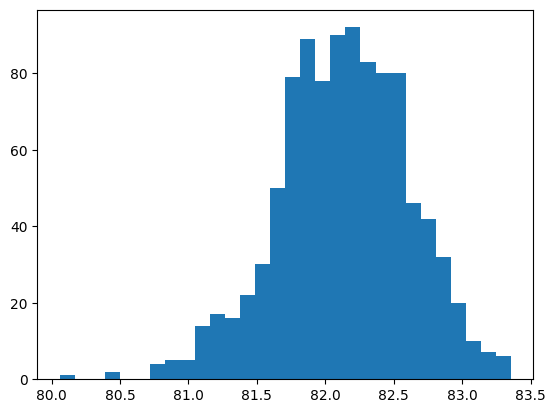

In [83]:
plt.hist(mean_cup_points_1000, bins=30)
plt.show()

***A sampling distribution is a distribution of replicates of point estimates***

### Approximate sampling distributions

In [84]:
sample_means_1000 = []
for i in range(1000):
    sample_means_1000.append(
        np.random.choice(list(range(1, 7)), size=4, replace=True).mean()
    )

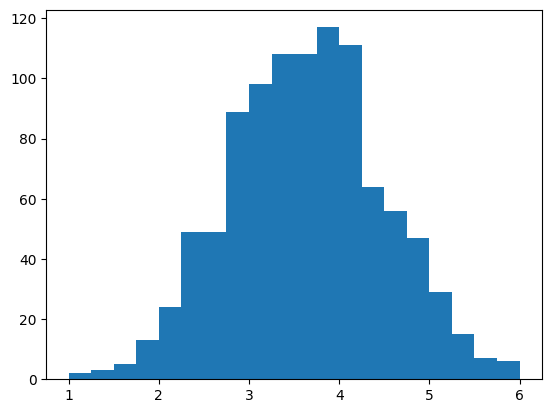

In [86]:
plt.hist(sample_means_1000, bins=20)
plt.show()

Usually, we don't have access to the whole population, so we can't calculate the exact sampling distribution, however we can feel relatively confident about using approximate distribution

### Standard errors and the Central Limit Theorem

As the sample size increases:
- The distribution of the average gets closer to being normally distributed
- The width of the sampling distribution gets narrower

In [102]:
print(coffee_ratings["total_cup_points"].std(ddof=0))

print("Sample 5")
print(coffee_ratings.sample(5)["total_cup_points"].std(ddof=1))
print("Sample 20")
print(coffee_ratings.sample(20)["total_cup_points"].std(ddof=1))
print("Sample 80")
print(coffee_ratings.sample(80)["total_cup_points"].std(ddof=1))
print("Sample 320")
print(coffee_ratings.sample(320)["total_cup_points"].std(ddof=1))

2.685858187306438
Sample 5
3.6289847064985
Sample 20
1.1636467179563244
Sample 80
2.2345302192257126
Sample 320
3.0252382660574844


Specify `ddof=0` when calling `.std()` on populations

Specify `ddof=1` when calling `.std()` on samples

<hr>

## Chapter 4: Bootstrap Distributions

### Introduction to bootstrapping

In [104]:
coffee_focus = coffee_ratings[["variety", "country_of_origin", "flavor"]]
coffee_focus = coffee_focus.reset_index()

coffee_focus.head()

,index,variety,country_of_origin,flavor
0,0,None,Ethiopia,8.83
1,1,Other,Ethiopia,8.67
2,2,Bourbon,Guatemala,8.50
3,3,None,Ethiopia,8.58
4,4,Other,Ethiopia,8.50


In [106]:
coffee_resamp = coffee_focus.sample(frac=1, replace=True)
coffee_resamp["index"].value_counts()

index
477     6
562     5
659     5
1019    5
454     4
       ..
551     1
705     1
1049    1
1328    1
767     1
Name: count, Length: 828, dtype: int64

Some of the coffees were sampled four or five times while others 0 times

In [109]:
num_unique_coffees = len(coffee_resamp.drop_duplicates(subset="index"))
print(num_unique_coffees)

828


In [110]:
len(coffee_ratings) - num_unique_coffees

510

510 were not included in `coffee_resamp`

- ***Bootstrapping is the opposite of sampling from a population***

- ***Sampling:*** going from a population to a smaller sample

- ***Bootstrapping:*** building up a theoretical population from the sample

**Bootstapping process:**
1) Make ea resample of the same size as the original sample
2) Calculate the statistic of interest for this bootstrap sample
3) Repeat steps 1 and 2 many times

The resulting statistics are ***bootstrap statistics*** and the form a ***bootstrap distribution***

In [111]:
mean_flavors_1000 = []
for i in range(1000):
    mean_flavors_1000.append(
        np.mean(coffee_resamp.sample(frac=1, replace= True)["flavor"])
    )

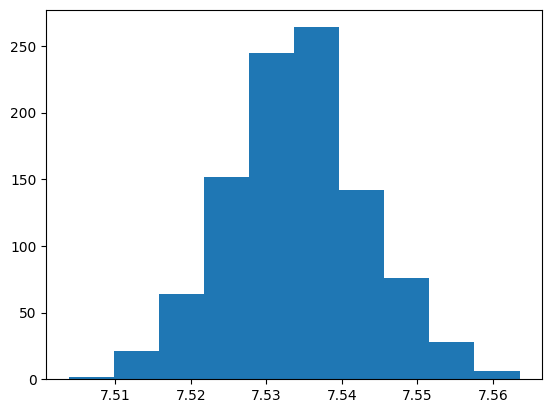

In [113]:
plt.hist(mean_flavors_1000)
plt.show()

### Comparing sampling and bootstrap distributions

In [114]:
coffee_sample = coffee_ratings[["variety", "country_of_origin", "flavor"]]\
    .reset_index().sample(n=500)

In [115]:
mean_flavors_5000 = []
for i in range(5000):
    mean_flavors_5000.append(
        np.mean(coffee_sample.sample(frac=1, replace=True)["flavor"])
    )

bootstrap_distn = mean_flavors_5000

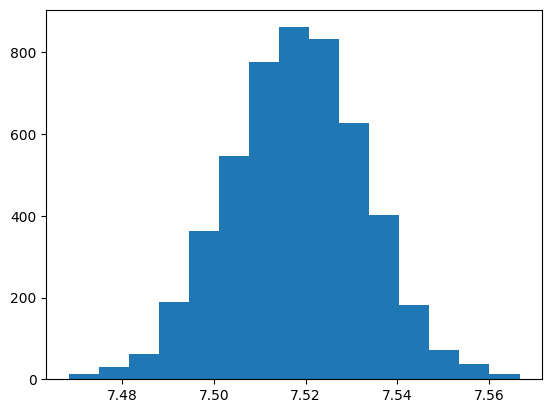

In [116]:
plt.hist(bootstrap_distn, bins=15)
plt.show()

In [117]:
print(f"Sample mean: {coffee_sample["flavor"].mean()}")
print(f"Estimated population mean: {np.mean(bootstrap_distn)}")
print(f"The population mean: {coffee_ratings["flavor"].mean()}")

Sample mean: 7.5178400000000005
Estimated population mean: 7.518031520000001
The population mean: 7.526046337817639


Bootstrap distribution mean:
- usually close to the sample mean
- May not be a good estimate of the population mean (***Bootstrapping cannot correct biases from sampling***)

Let's now look at the std

In [119]:
print(f"Sample mean: {coffee_sample["flavor"].std()}")
print(f"Estimated population mean: {np.std(bootstrap_distn, ddof=1)}")

Sample mean: 0.3304423075776989
Estimated population mean: 0.01479649086364654


In [120]:
standard_error = np.std(bootstrap_distn, ddof=1)
standard_error * np.sqrt(500)

0.3308595939956824

***Interpreting the standard errors***
- estimated standard error (loop) is the standard deviation of the bootstrap distribution for a sample statistic
- `Population std dev = Std.Error * np.sqrt(Sample size)`

Even though bootstrapping was poor for estimating population mean, it is generally great for estimating population std

***Remeber when using bootstrap we assume that we have no data on the population, therefore we have to work with a sample and resample it***

**The sampling distribution mean can be used to estimate the population mean, but that is not the case with the bootstrap distribution.**

### Confidence intervals

In [124]:
print(np.quantile(bootstrap_distn, 0.025)) #lower bound
np.quantile(bootstrap_distn, 0.975) #upper bound

7.4894995


7.546800499999999

In [122]:
from scipy.stats import norm
norm.ppf(quantile, loc=0, scale=1) #params are set to the normal stardars distribution

In [125]:
point_estimate = np.mean(bootstrap_distn)

std_error = np.std(bootstrap_distn, ddof=1)

lower = norm.ppf(0.025, loc=point_estimate, scale=std_error)
upper = norm.ppf(0.975, loc=point_estimate, scale=std_error)
print((lower, upper))

(7.489030930809678, 7.547032109190324)


Task 1

In [ ]:
# Find the mean and std dev of the bootstrap distribution
point_estimate = np.mean(bootstrap_distribution)
standard_error = np.std(bootstrap_distribution, ddof=1)

# Find the lower limit of the confidence interval
lower_se = norm.ppf(0.025, loc=point_estimate, scale=standard_error)

# Find the upper limit of the confidence interval
upper_se = norm.ppf(0.975, loc=point_estimate, scale=standard_error)

# Print standard error method confidence interval
print((lower_se, upper_se))